In [234]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("test.csv")
pd.set_option('display.max_columns', None)
#df = df.fillna(0.1) #use this if there is NaN
df = df.replace(0,0.1)
df

,conc,read
0,0.1,1.292776
1,0.1,1.282831
2,15.0,1.291461
3,15.0,1.307615
4,150.0,1.276140
5,150.0,1.283468
6,1500.0,1.141243
7,1500.0,1.142440
8,15000.0,0.688131
9,15000.0,0.692440


fitted parameters 
 HS =  -1.1272957271503885 
 Emax =  1.2939737791212726 
 Emin =  0.5001047065969815 
 EC50 =  5381.593409492886 pM 
 log10(EC50) =  3.7309108828212776 
 R^2 =  0.9996778992769664


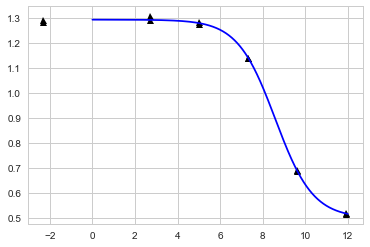

In [238]:
def sig(conc, HS, Emax, Emin, EC50):
    return Emax + ((Emin-Emax)/(1 + np.exp(HS*(np.log(conc)-np.log(EC50)))))

from scipy.optimize import curve_fit
conc = df['conc'].values
readout = df['read'].values

g = [-0.1,100,500,100]

c,cov = curve_fit(sig,conc,readout,g)

from sklearn.metrics import r2_score

print('fitted parameters', '\n',
      'HS = ', c[0], '\n',
      'Emax = ', c[1], '\n',
      'Emin = ', c[2], '\n',
      'EC50 = ', c[3],'pM \n',
      'log10(EC50) = ', np.log10(c[3]), '\n',
      'R^2 = ', r2_score(y,df['read']))
     
n = len(df['conc'])
y = np.empty(n)
for i in range(n):
    y[i] = sig(df['conc'][i], c[0], c[1], c[2], c[3])

plt.style.use('seaborn-whitegrid')

plt.plot(np.log(df['conc']),df['read'],'^', color='black')
x = np.linspace(1, np.exp(12), 10**5)
plt.plot(np.log(x),sig(x,c[0], c[1], c[2], c[3]),'b')
